# K-MEANS
1. 데이터 전처리
2. 벡터화 및 PCA
3. n_cluster 확인
4. 핵심 키워드 확인
5. 워드클라우드
6. 군집화 시각화
7. 차원 복원

In [1]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 52.0MB/s 
     |████████████████████████████████| 92kB 7.6MB/s 
     |████████████████████████████████| 460kB 43.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
# 워드클라우드를 위해 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
# 폰트 확인
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn import metrics
from konlpy.tag import Okt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from wordcloud import WordCloud
from IPython.display import set_matplotlib_formats 

# 1. 데이터전처리

In [6]:
document_df1 = pd.read_csv('./01_원피스_attrangs.csv', encoding='utf-8')
document_df2 = pd.read_csv('./02_스커트_attrangs.csv', encoding='utf-8')
document_df3 = pd.read_csv('./02_치마_attrangs.csv', encoding='utf-8')
document_df4 = pd.read_csv('./09_셔츠_attrangs.csv', encoding='utf-8')

In [7]:
document_df = pd.concat([document_df1,document_df2,document_df3,document_df4])
len(document_df)

2683

In [8]:
document_df.isna().sum()

Unnamed: 0    0
keyword       0
title         0
text          8
url           0
dtype: int64

In [9]:
# null값 삭제
document_df = document_df.dropna()
print(document_df.isna().sum())

Unnamed: 0    0
keyword       0
title         0
text          0
url           0
dtype: int64


In [10]:
# re.sub으로 지정 단어 교체
data1 = []
for text in tqdm(document_df['text']):
    text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "",str(text))
    text = re.sub("ㅎㅎ", "",str(text))
    text = re.sub("ㅜㅜ", "",str(text))
    text = re.sub("ㅠㅠ", "",str(text))
    text = re.sub("까지", "",str(text))
    text = re.sub("으로", "",str(text))
    text = re.sub("해주세요", "",str(text))
    text = re.sub("드려요", "",str(text))
    text = re.sub("입기", "",str(text))
    text = re.sub("예요", "",str(text))
    text = re.sub("있는", "",str(text))
    text = re.sub("드립니다", "",str(text))
    text = re.sub("좋은", "",str(text))
    text = re.sub("있어요", "",str(text))
    text = re.sub("없이", "",str(text))
    text = re.sub("모델", "",str(text))
    data1.append(text)

In [11]:
def define_stopwords(path):    
    SW = set()
    # 불용어를 추가하는 방법 1.
#     for i in string.punctuation:
#         SW.add(i)
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가    
    with open(path) as f:
        for word in f:
            SW.add(word)
    return SW

In [12]:
# stop_word 텍스트 파일에 있는 불용어 단어들을 SW 변수에 저장
SW = define_stopwords('./stop_word.txt')

In [13]:
SW

{'가\n',
 '까지\n',
 '는\n',
 '드려요\n',
 '드립니다\n',
 '로\n',
 '를\n',
 '에\n',
 '예요\n',
 '으로\n',
 '은\n',
 '을\n',
 '의\n',
 '이\n',
 '일리\n',
 '입기\n',
 '있는\n',
 '있어요\n',
 '좋은\n',
 '준비\n',
 '참고',
 '한\n',
 '해주세요\n',
 '했어요\n'}

In [14]:
# Okt로 전체 텍스트 형태소 분석
okt = Okt()
docs = []

for n in tqdm(data1, desc="Preprocessing"):
    # 형태소 분석
    token_text = okt.morphs(n)
    # SW에 포함되지 않고 2글자 이상인 형태소들만 token_text에 저장
    token_text = [word for word in token_text if word not in SW and len(word) > 1]
    docs.append(token_text)

In [15]:
docs[0]

['코디',
 '걱정',
 '단숨',
 '예뻐지는',
 '슬림핏',
 '배색',
 '원피스',
 '이건',
 '보자마자',
 '바로',
 '들께',
 '보여',
 '드려야',
 '겠다',
 '생각',
 '원피스',
 '에요',
 '바쁜',
 '아침',
 '이나',
 '데이트',
 '스니커즈',
 '샌들',
 '과도',
 '이지',
 '하게',
 '베이직',
 '니트',
 '원피스',
 '소개',
 '해드릴게요',
 '부드러우면서',
 '유연한',
 '니트',
 '브릭',
 '기분',
 '착용',
 '선사',
 '드리며',
 '쫀득',
 '신축',
 '불편함이',
 '전혀',
 '없어요',
 '휘뚜루마뚜루',
 '즐겨',
 '좋아',
 '때로는',
 '레이어',
 '드용',
 '자주',
 '가는',
 '일리',
 '스랍',
 '입는',
 '순간',
 '부드럽게',
 '바디',
 '감싸주는',
 '촉촉한',
 '니트',
 '브릭',
 '미니',
 '원피스',
 '깔끔한',
 '카라넥',
 '트임을',
 '더해',
 '여성',
 '스러',
 '더욱',
 '느껴지구요',
 '카라넥',
 '배색',
 '해주어',
 '밋밋함',
 '없는',
 '은은한',
 '포인트',
 '더했어요',
 '또한',
 '바디',
 '라인',
 '곡선',
 '따라',
 '부드럽게',
 '핏되',
 '슬림핏',
 '디자인',
 '라인',
 '몸매',
 '완성',
 '해주며',
 '미니',
 '미디',
 '기장',
 '롱아',
 '들도',
 '부담',
 '착용',
 '해보실',
 '있답니다',
 '컬러',
 '경우',
 '가지',
 '컬러',
 '준비',
 '되어',
 '아이보리',
 '부드럽고',
 '뽀얀',
 '색감',
 '아이보리',
 '핑크',
 '여자',
 '로망',
 '로맨틱',
 '핑크',
 '스카이',
 '블루',
 '여리',
 '여리',
 '청순한',
 '스카이',
 '블루',
 '네이비',
 '캐주',
 '얼하면서도',
 '세련된',
 '네이비',
 '사이즈',
 '준비',
 

In [16]:
# 
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

In [17]:
docs[0]

'코디 걱정 단숨 예뻐지는 슬림핏 배색 원피스 이건 보자마자 바로 들께 보여 드려야 겠다 생각 원피스 에요 바쁜 아침 이나 데이트 스니커즈 샌들 과도 이지 하게 베이직 니트 원피스 소개 해드릴게요 부드러우면서 유연한 니트 브릭 기분 착용 선사 드리며 쫀득 신축 불편함이 전혀 없어요 휘뚜루마뚜루 즐겨 좋아 때로는 레이어 드용 자주 가는 일리 스랍 입는 순간 부드럽게 바디 감싸주는 촉촉한 니트 브릭 미니 원피스 깔끔한 카라넥 트임을 더해 여성 스러 더욱 느껴지구요 카라넥 배색 해주어 밋밋함 없는 은은한 포인트 더했어요 또한 바디 라인 곡선 따라 부드럽게 핏되 슬림핏 디자인 라인 몸매 완성 해주며 미니 미디 기장 롱아 들도 부담 착용 해보실 있답니다 컬러 경우 가지 컬러 준비 되어 아이보리 부드럽고 뽀얀 색감 아이보리 핑크 여자 로망 로맨틱 핑크 스카이 블루 여리 여리 청순한 스카이 블루 네이비 캐주 얼하면서도 세련된 네이비 사이즈 준비 되었으니 하단 상세 사이즈 촬영 진행 슬림 바디 랍니 사이즈 추천 해드릴게요 세탁 드라이클리닝 해주시거나 제로 단독 세탁 관리 혼용 두께 중간 비침 중간 신축 높음 안감 없음 세탁 세탁 드라이 단독 세탁 세탁 세탁기 금지 세탁 건조기 사용 불가'

# 2. 벡터화 및 PCA

In [18]:
# CountVectorizer : 전체 텍스트들을 띄어쓰기를 기준으로 나눈 후 나눈 단어들의 빈도 수에 맞게 정수화 
# 명사를 벡터로 만들기
vec = CountVectorizer()
X = vec.fit_transform(docs)

In [19]:
# 해당 단어가 갖는 정수 표현
vec.vocabulary_

{'코디': 7717,
 '걱정': 396,
 '단숨': 1584,
 '예뻐지는': 5676,
 '슬림핏': 4757,
 '배색': 3419,
 '원피스': 5998,
 '이건': 6138,
 '보자마자': 3636,
 '바로': 3255,
 '들께': 2269,
 '보여': 3603,
 '드려야': 2191,
 '겠다': 469,
 '생각': 4251,
 '에요': 5546,
 '바쁜': 3257,
 '아침': 5123,
 '이나': 6145,
 '데이트': 1853,
 '스니커즈': 4637,
 '샌들': 4246,
 '과도': 618,
 '이지': 6259,
 '하게': 8475,
 '베이직': 3510,
 '니트': 1483,
 '소개': 4456,
 '해드릴게요': 8753,
 '부드러우면서': 3725,
 '유연한': 6070,
 '브릭': 3862,
 '기분': 804,
 '착용': 7379,
 '선사': 4336,
 '드리며': 2228,
 '쫀득': 7302,
 '신축': 4869,
 '불편함이': 3830,
 '전혀': 6849,
 '없어요': 5483,
 '휘뚜루마뚜루': 9083,
 '즐겨': 7133,
 '좋아': 6981,
 '때로는': 2396,
 '레이어': 2569,
 '드용': 2248,
 '자주': 6634,
 '가는': 21,
 '일리': 6315,
 '스랍': 4638,
 '입는': 6369,
 '순간': 4582,
 '부드럽게': 3733,
 '바디': 3240,
 '감싸주는': 247,
 '촉촉한': 7557,
 '미니': 3161,
 '깔끔한': 870,
 '카라넥': 7647,
 '트임을': 8022,
 '더해': 1765,
 '여성': 5597,
 '스러': 4639,
 '더욱': 1747,
 '느껴지구요': 1406,
 '해주어': 8863,
 '밋밋함': 3220,
 '없는': 5460,
 '은은한': 6105,
 '포인트': 8286,
 '더했어요': 1791,
 '또한': 2442,
 '라인': 2497,


In [20]:
# 0~9166까지 번호가 매겨지는데, 각 텍스트 내 vocabulary에 있는 단어가 등장하면 그에 맞는 정수값 위치에 1이 들어감, 나머지는 0 
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
## example
# vocabulary = [나는 = 0 / 사과가 = 1 / 바나나가 = 2 / 좋아요 = 3 / 싫어요 = 4]
# 이때 "나는 오렌지가 좋아요"라는 텍스트 를 집어넣으면
# 해당 문장은 0 0 0 0 0 (vocabulary의 갯수)으로 변환 => 전부 0 으로 표시
# 그리고 텍스트에서 vocabulary에 해당되는 단어인 '나는', '좋아요' 를 추적
# 그러면 '나는'에 해당하는 정수값 0, '좋아요'에 해당하는 정수값 3이 나온다
# 그리면 기존의 0 0 0 0 0 이 정수값 위치에 맞게 1 0 0 1 0 으로 변환된다
# 이것이 X.toarray()가 이뤄지는 과정이다

In [22]:
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [23]:
# 2675개의 텍스트가 9166개의 토큰으로 이루어져 있다
df.shape

(2675, 9166)

In [24]:
df.head()

,가가,가거나,가게,가격,가고,가공,가기,가길어,가까운,가까이,가깝게,가깝다,가끔,가나,가냘픈,가녀려,가녀리게,가녀리고,가녀리면서도,가녀린,가느다란,가는,가늘게,가늘고,가늘어,가능,가능성,가능하게,가능하고,가능하고요,가능하구요,가능하기,가능하니,가능하다고,가능하다는거,가능하다는게,가능하답니다,가능하도록,가능하며,가능하면서,...,흡수,흡습성,흩날려,흩날려서,흩날리는,흩날리는듯,흩날리며,흩날리면서,흩날리지,흩어지는,희소가치,희소성,흰색,히든,히트,히트텍,힌번,힐로,힐링,힘드셨던,힘드셨을거,힘드셨죠,힘드시죠,힘드실까,힘드실꺼에요,힘든,힘든데,힘들만큼,힘들어서,힘들었던,힘없는,힙걸들,힙라,힙라인,힙라인는,힙부분,힙선,힙하,힙함,힙합
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
## 데이터들은 다차원인 경우가 많기 때문에 이를 분석하기 위해서는 차원을 축소할 필요가 있다 => PCA 사용
# 주성분 분석하기
# n_components의 변수를 2~10에 주고 n_cluster(하단 코드에서 등장) 변수 수치를 2~10을 준 결과, 2가 가장 결과가 좋았다(군집화가 가장 잘됨)
k_pca = PCA(n_components = 2)

k_principalComponents = k_pca.fit_transform(df)

# 3. n_cluster 확인

n_clusters = 2, silhouette score 0.531318
n_clusters = 3, silhouette score 0.565751
n_clusters = 4, silhouette score 0.404083
n_clusters = 5, silhouette score 0.408495
n_clusters = 6, silhouette score 0.388337
n_clusters = 7, silhouette score 0.401112
n_clusters = 8, silhouette score 0.400618
n_clusters = 9, silhouette score 0.383056



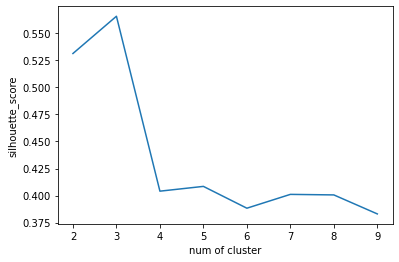

In [ ]:
## 실루엣 스코어로 클러스터 수 결정 ##

# create list of k values to test and then use for loop
x = []
y = []

for k in tqdm(range(2,10)):
    # 무작위 데이터로 K-Means에 k 개의 클러스터를 넣기 
    kmeans_test = KMeans(n_clusters = k, random_state = 42).fit(k_principalComponents)
    # k개의 레이블로 pca 한 데이터를 입력
    cluster_labels = kmeans_test.predict(k_principalComponents)
    # 사이킷런에서 제공하는 실루엣 스코어를 사용
    S = metrics.silhouette_score(k_principalComponents, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:1f}".format(k, S))
    x.append(k)
    y.append(S)
# k개의 클러스터에 따른 실루엣 스코어 시각화
plt.plot(x, y)
plt.xlabel('num of cluster')
plt.ylabel('silhouette_score')
plt.show()
# 비슷한 데이터들이 얼마나 응집해있고 서로 다른 데이터들이 얼마나 멀리 있는지 알려주는 실루엣 스코어가 3에서 가장 좋았다

# 4. 핵심키워드 확인

In [ ]:
# 명사를 벡터로 만들기
vec = CountVectorizer()
X = vec.fit_transform(docs)

In [ ]:
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [ ]:
# kmeans = KMeans(n_clusters=3).fit(k_principalComponents)
kmeans = KMeans(n_clusters=3).fit(df)
## K-means : n_cluster 값이 주어지면 즉시 개수에 맞게 임의로 무게중심을 잡는다
# 3개로 예시를 들면, 3개의 무게중심(kmeans.cluster_centers)을 중심으로 모든 데이터들이 자신들의 위치값을 기준으로 가까운 무게중심에 군집한다
# 군집하는 과정에서 무게중심은 데이터들 간의 평균 거리에 맞춰 조금씩 움직이며 수정된다
# 위 과정을 반복하면 점점 군집화가 되고 군집에 대한 변화가 더 이상 없으면 군집화는 완료된다

In [ ]:
cluster_label = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [ ]:
cluster_label

array([2, 2, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
cluster_centers

array([[-1.02999206e-18, -2.05998413e-18,  3.73134328e-03, ...,
        -2.05998413e-18, -4.11996826e-18,  3.73134328e-03],
       [ 2.93255132e-03, -3.46944695e-18,  8.79765396e-03, ...,
        -3.46944695e-18, -6.93889390e-18, -1.73472348e-18],
       [-4.01154804e-18,  9.68054211e-04,  9.68054211e-03, ...,
         9.68054211e-04,  1.93610842e-03, -4.01154804e-18]])

In [ ]:
document_df['cluster_label'] = cluster_label
document_df.head()

,Unnamed: 0,keyword,title,text,url,cluster_label
0,0,원피스,op11334 글램한 실루엣의 슬림핏 배색카라 포인트 프릴 H라인 니트 미니 원피스...,"""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ♥ MD C...",https://attrangs.co.kr/shop/view.php?index_no=...,2
1,1,원피스,op11351 다양한 연출이 가능한 핏앤플레어 라인감의 뷔스티에 원피스 dress,"""페미닌함 가득 담은♥ 레이어드 뷔스티에 원피스-"" ♥ MD COMME...",https://attrangs.co.kr/shop/view.php?index_no=...,2
2,2,원피스,op11427 로맨틱한 퍼프 반팔 소매의 스트링 장식 플리츠 롱 원피스 dress,"""로맨틱 플리츠 한다발!♥ 사랑스러운 무드의 퍼프 반팔 롱 원피스-"" ...",https://attrangs.co.kr/shop/view.php?index_no=...,0
3,3,원피스,op9580 편안한 착용감과 허리스트링 디자인의 플리츠디자인 라운드넥 롱 플레어원피...,"""일상도 특별하게♥ 페미닌한 플리츠배색의 롱 플레어원피스-"" ♥ MD ...",https://attrangs.co.kr/shop/view.php?index_no=...,2
4,4,원피스,op11375 꾸안꾸 무드의 플레어 라인 맥시 골지니트 나시 원피스 dress,"""안입은듯 편하게!♥ 꾸안꾸 무드의 플레어 나시 원피스-"" ♥ MD C...",https://attrangs.co.kr/shop/view.php?index_no=...,0


In [ ]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['text']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames        
    return cluster_details

In [ ]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:3])
        print('==================================================')

In [ ]:
feature_names = vec.get_feature_names()

In [ ]:
cluster_details = get_cluster_details(cluster_model=kmeans, cluster_data=document_df,
                                  feature_names=feature_names, clusters_num=3, top_n_features=70)
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['컬러', '사이즈', '세탁', '라인', '착용', '제작', '아이템', '포인트', '스커트', '연출', '추천', '일리', '단독', '무드', '블랙', '소재', '준비', '기장', '디자인', '원피스', '되어', '아이보리', '함께', '블루', '느낌', '핑크', '상세', '랍니', '사용', '중간', '경우', '이에요', '바디', '더욱', '따라', '예쁜', '건조기', '안감', '완성', '처럼', '색감', '니트', '세탁기', '베이지', '체형', '매치', '두께', '신축', '패턴', '않고', '없음', '비침', '허리', '제품', '하기', '에는', '슬림', '되었어요', '여성', '가지', '활용', '권장', '스카이', '티셔츠', '소장', '에도', '베이직', '너무', '드라이클리닝', '깔끔한']
Reviews 파일명 : ['\xa0 \xa0 "로맨틱 플리츠 한다발!♥ 사랑스러운 무드의 퍼프 반팔 롱 원피스-" \xa0\xa0 ♥ MD COMMENT 너무너무 사랑스러운 플리츠 롱 원피스 소개해 드려요~ 데일리한 무드와 러블리한 무드가 공존하는 아이템으로, 데일리룩, 데이트룩, 하객룩까지 정말 다양하게 활용하기 좋은 원피스 제품이에요. 통기성 좋은 코튼 100% 소재로 제작되었으며, 몸에 감기지 않는 크리스피한 터치감으로 올 여름을 책임지게 될 요 아이템! 한 컬러쯤 소장해 주시길 꼭 바랄게요♥ \xa0 ♥ DETAIL TIP 로맨틱한 플리츠 디테일을 원피스 전체에 둘러준 아이템이에요. 단정한 라운드넥과 반팔 퍼프 슬리브로 예쁜 직각 숄더 라인을 선사해 드리며, 넉넉한 사이즈와 A 라인으로 떨어지는\xa0롱한 기장감으로, 미운 군살을 가볍게 커버해 드려요. 허리 스트링 내장으로 사이즈 조절이 가능하며, 약간의 요철감이 있는 링클 패브릭으로 제작되어 생활 주름 걱정 없이 입기 좋은 제품이에요. 백라인 콘솔지퍼로 깔끔하고 이

# 5. 워드클라우드

In [ ]:
result = []
for i in range(0,3):
    for j in range(len(cluster_details[i]['top_features'])):
        result.append(cluster_details[i]['top_features'][j])

print(result[:5])
print(len(result))

['컬러', '사이즈', '세탁', '라인', '착용']
210


In [ ]:
okt = Okt() 
morphs = [] 

for sentence in result: 
    morphs.append(okt.pos(sentence))

print(morphs[:5])
print(len(morphs))

[[('컬러', 'Noun')], [('사이즈', 'Noun')], [('세탁', 'Noun')], [('라인', 'Noun')], [('착용', 'Noun')]]
210


In [ ]:
noun_adj_list=[] 
for sentence in morphs: 
    for word, tag in sentence: 
        # tag가 Noun인 값들만 추출
        if tag in ['Noun']: 
            noun_adj_list.append(word)
    
print(noun_adj_list[:5])
print(len(noun_adj_list))

['컬러', '사이즈', '세탁', '라인', '착용']
170


In [ ]:
# Counter를 사용해서 빈도수를 확인하고 워드클라우드 준비
count = Counter(noun_adj_list)
words = dict(count.most_common())
words

{'가지': 1,
 '건조기': 2,
 '경우': 2,
 '관리': 1,
 '구매': 1,
 '구성': 1,
 '권장': 1,
 '금지': 1,
 '기장': 3,
 '느낌': 2,
 '니트': 3,
 '다리미': 1,
 '단독': 3,
 '더욱': 2,
 '데이트': 1,
 '두께': 2,
 '드라이': 1,
 '드라이클리닝': 3,
 '디자인': 3,
 '라인': 3,
 '랍': 2,
 '매치': 2,
 '무드': 3,
 '미니': 1,
 '바디': 2,
 '반드시': 1,
 '밴딩': 1,
 '베이지': 2,
 '베이직': 3,
 '불가': 1,
 '브릭': 2,
 '블라우스': 1,
 '블랙': 2,
 '블루': 1,
 '사용': 3,
 '사이즈': 3,
 '살짝': 1,
 '상세': 2,
 '색감': 1,
 '색상': 1,
 '선사': 2,
 '세탁': 3,
 '세탁기': 2,
 '세트': 1,
 '셔츠': 1,
 '소장': 1,
 '소재': 3,
 '스카이': 1,
 '스커트': 3,
 '스팀': 1,
 '슬림': 3,
 '신축': 3,
 '실루엣': 1,
 '아이보리': 1,
 '아이템': 3,
 '안감': 3,
 '여성': 2,
 '여유': 1,
 '연출': 3,
 '완성': 2,
 '원단': 1,
 '원피스': 3,
 '일리': 3,
 '정핏': 1,
 '제작': 3,
 '제품': 3,
 '준비': 3,
 '중간': 2,
 '중성세제': 1,
 '지나': 1,
 '진행': 1,
 '차이': 1,
 '착용': 3,
 '처럼': 1,
 '체형': 3,
 '촬영': 1,
 '추천': 3,
 '컬러': 3,
 '코디': 1,
 '테일로': 1,
 '티셔츠': 2,
 '패턴': 2,
 '포인트': 3,
 '플레어': 1,
 '피팅': 1,
 '핏감': 1,
 '핑크': 2,
 '하단': 1,
 '허리': 3,
 '혼용': 1,
 '활용': 2}

In [ ]:
count.most_common()

[('컬러', 3),
 ('사이즈', 3),
 ('세탁', 3),
 ('라인', 3),
 ('착용', 3),
 ('제작', 3),
 ('아이템', 3),
 ('포인트', 3),
 ('스커트', 3),
 ('연출', 3),
 ('추천', 3),
 ('일리', 3),
 ('단독', 3),
 ('무드', 3),
 ('소재', 3),
 ('준비', 3),
 ('기장', 3),
 ('디자인', 3),
 ('원피스', 3),
 ('사용', 3),
 ('안감', 3),
 ('니트', 3),
 ('체형', 3),
 ('신축', 3),
 ('허리', 3),
 ('제품', 3),
 ('슬림', 3),
 ('베이직', 3),
 ('드라이클리닝', 3),
 ('블랙', 2),
 ('느낌', 2),
 ('핑크', 2),
 ('상세', 2),
 ('랍', 2),
 ('중간', 2),
 ('경우', 2),
 ('바디', 2),
 ('더욱', 2),
 ('건조기', 2),
 ('완성', 2),
 ('세탁기', 2),
 ('베이지', 2),
 ('매치', 2),
 ('두께', 2),
 ('패턴', 2),
 ('여성', 2),
 ('활용', 2),
 ('티셔츠', 2),
 ('선사', 2),
 ('브릭', 2),
 ('아이보리', 1),
 ('블루', 1),
 ('처럼', 1),
 ('색감', 1),
 ('가지', 1),
 ('권장', 1),
 ('스카이', 1),
 ('소장', 1),
 ('피팅', 1),
 ('반드시', 1),
 ('지나', 1),
 ('구매', 1),
 ('관리', 1),
 ('스팀', 1),
 ('정핏', 1),
 ('차이', 1),
 ('다리미', 1),
 ('블라우스', 1),
 ('여유', 1),
 ('코디', 1),
 ('셔츠', 1),
 ('색상', 1),
 ('살짝', 1),
 ('중성세제', 1),
 ('데이트', 1),
 ('플레어', 1),
 ('테일로', 1),
 ('원단', 1),
 ('드라이', 1),
 ('하단', 1),
 ('혼용', 1),
 

In [ ]:
plt.rc('font',family = 'Malgun Gothic') 

set_matplotlib_formats('retina') 

plt.rc('axes',unicode_minus = False)

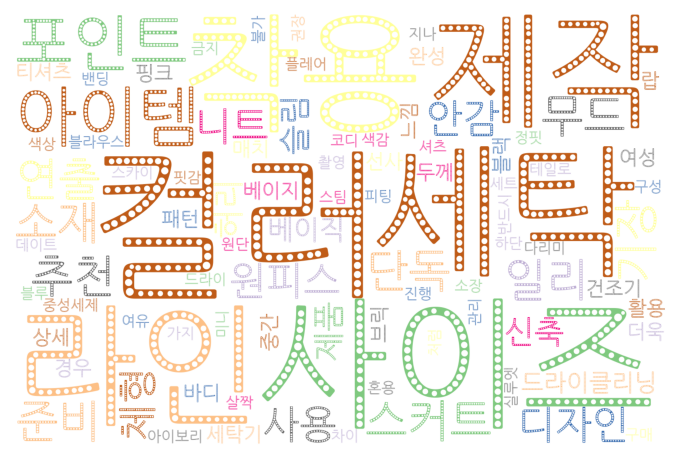

In [ ]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', 
                      background_color='white',
                      colormap = "Accent_r", 
                      width=1500, 
                      height=1000).generate_from_frequencies(words) 
                      
plt.imshow(wordcloud) 
plt.axis('off')
# plt.savefig('./wordcloud.png') 
plt.show()

# 6. 군집화 시각화

In [ ]:
# 주성분 분석의 결과를 데이터 프레임으로 만들기
k_df_pca = pd.DataFrame(data = k_principalComponents,
                        columns = ["PC1", "PC2"])
k_df_pca.index = document_df['title']

In [ ]:
k_df_pca.head()

,PC1,PC2
title,,
op11334 글램한 실루엣의 슬림핏 배색카라 포인트 프릴 H라인 니트 미니 원피스 dress,2.551989,-0.994666
op11351 다양한 연출이 가능한 핏앤플레어 라인감의 뷔스티에 원피스 dress,1.750236,0.571238
op11427 로맨틱한 퍼프 반팔 소매의 스트링 장식 플리츠 롱 원피스 dress,5.377196,2.710019
op9580 편안한 착용감과 허리스트링 디자인의 플리츠디자인 라운드넥 롱 플레어원피스 dress,1.002967,-2.384540
op11375 꾸안꾸 무드의 플레어 라인 맥시 골지니트 나시 원피스 dress,7.801842,4.088738


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put i

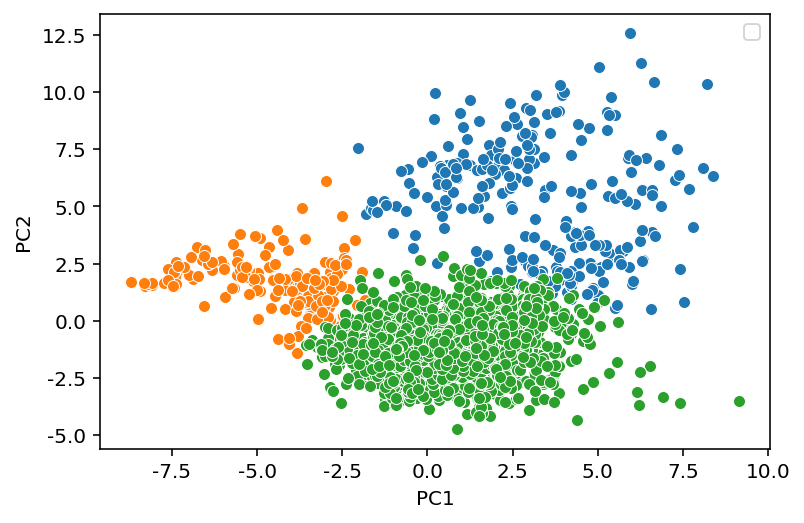

In [ ]:
# 그래프 작성하기
# plt로도 작성 가능(sns->plt, 주석처리 되돌리고 실행)
sns.scatterplot(k_df_pca.iloc[kmeans.labels_ == 0, 0],
            k_df_pca.iloc[kmeans.labels_ == 0, 1])
            # s       = 10,
            # c       = "red",
            # label = "Cluster1")

sns.scatterplot(k_df_pca.iloc[kmeans.labels_ == 1, 0],
            k_df_pca.iloc[kmeans.labels_ == 1, 1])
            # s       = 10,
            # c       = "blue",
            # label = "Cluster2")

sns.scatterplot(k_df_pca.iloc[kmeans.labels_ == 2, 0],
            k_df_pca.iloc[kmeans.labels_ == 2, 1])
            # s       = 10,
            # c       = "green",
            # label = "Cluster3")

plt.legend()
plt.show()

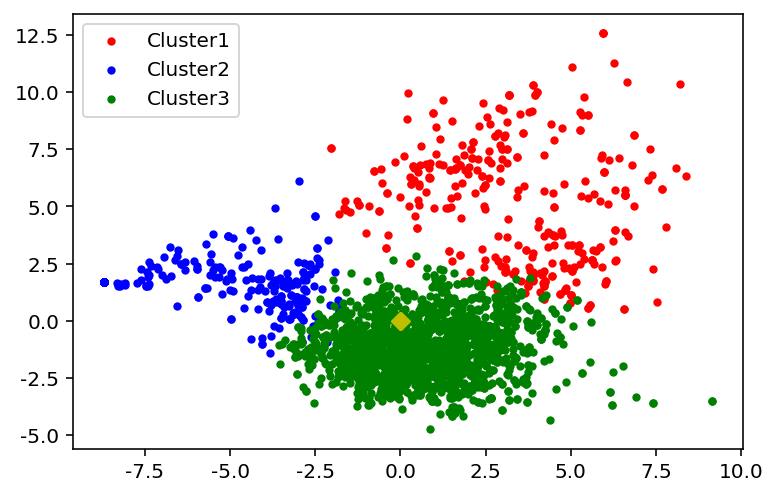

In [ ]:
# plt로도 작성 가능(sns->plt, 주석처리 되돌리고 실행)
plt.scatter(k_df_pca.iloc[kmeans.labels_ == 0, 0],
            k_df_pca.iloc[kmeans.labels_ == 0, 1],
            s       = 10,
            c       = "red",
            label = "Cluster1")

plt.scatter(k_df_pca.iloc[kmeans.labels_ == 1, 0],
            k_df_pca.iloc[kmeans.labels_ == 1, 1],
            s       = 10,
            c       = "blue",
            label = "Cluster2")

plt.scatter(k_df_pca.iloc[kmeans.labels_ == 2, 0],
            k_df_pca.iloc[kmeans.labels_ == 2, 1],
            s       = 10,
            c       = "green",
            label = "Cluster3")

plt.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], marker='D', c='y')

plt.legend()
plt.show()

# 7. 차원 복원

In [ ]:
# PCA로 차원 축소한 텍스트들을 다시 원래 차원으로 복구
X_recovered = k_pca.inverse_transform(k_principalComponents)

In [ ]:
# 다시 K-Means
kmeans = KMeans(n_clusters=3).fit(X_recovered)

In [ ]:
cluster_label = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [ ]:
document_df['cluster_label'] = cluster_label
document_df.head()

,Unnamed: 0,keyword,title,text,url,cluster_label
0,0,원피스,op11334 글램한 실루엣의 슬림핏 배색카라 포인트 프릴 H라인 니트 미니 원피스...,"""코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"" ♥ MD C...",https://attrangs.co.kr/shop/view.php?index_no=...,1
1,1,원피스,op11351 다양한 연출이 가능한 핏앤플레어 라인감의 뷔스티에 원피스 dress,"""페미닌함 가득 담은♥ 레이어드 뷔스티에 원피스-"" ♥ MD COMME...",https://attrangs.co.kr/shop/view.php?index_no=...,1
2,2,원피스,op11427 로맨틱한 퍼프 반팔 소매의 스트링 장식 플리츠 롱 원피스 dress,"""로맨틱 플리츠 한다발!♥ 사랑스러운 무드의 퍼프 반팔 롱 원피스-"" ...",https://attrangs.co.kr/shop/view.php?index_no=...,2
3,3,원피스,op9580 편안한 착용감과 허리스트링 디자인의 플리츠디자인 라운드넥 롱 플레어원피...,"""일상도 특별하게♥ 페미닌한 플리츠배색의 롱 플레어원피스-"" ♥ MD ...",https://attrangs.co.kr/shop/view.php?index_no=...,1
4,4,원피스,op11375 꾸안꾸 무드의 플레어 라인 맥시 골지니트 나시 원피스 dress,"""안입은듯 편하게!♥ 꾸안꾸 무드의 플레어 나시 원피스-"" ♥ MD C...",https://attrangs.co.kr/shop/view.php?index_no=...,2


In [ ]:
feature_names = vec.get_feature_names()

In [ ]:
cluster_details = get_cluster_details(cluster_model=kmeans, cluster_data=document_df,
                                  feature_names=feature_names, clusters_num=3, top_n_features=20 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['사이즈', '착용', '세탁', '추천', '체형', '라인', '디자인', '원피스', '포인트', '이에요', '상세', '따라', '허리', '소재', '사용', '제작', '느낌', '밴딩', '없음', '연출']
Reviews 파일명 : ['미니미니한 스티치포켓원피스예요!! 나트소재로 고급스러우면서 러블리하답니다^^ \xa0 \xa0 *저는 Ivory 색상 Free 사이즈를 피팅했어요 :) \xa0 \xa0 ', '  COMMENT \xa0 슬림한 핏감의 골지 롱 니트원피스예요.  라운드넥으로 깔끔하게 입기좋고  H라인으로 롱하게 떨어지는 핏감이  몸매 라인을 예쁘게 만들어줘요.  신축성이 좋아서 편하게 입으실수 있으며  밑단 슬릿 디테일로 활동성도 좋답니다.  단독도 좋지만 셔츠나 자켓을 툭 걸쳐 주시는것도 추천드려요. \xa0 *Yellow 화사한 쨍한 컬러감의 옐로우 *Pink\xa0 여성스러운 포인트 핑크 *DeepBlue\xa0 딥한 컬러감의 딥블루 *Gray\xa0 소라빛이 감도는 그레이 *Black\xa0 머스트해브 블랙 \xa0 SIZE & LAUNDRY TIP \xa0 Free 사이즈로 44~66반 사이즈인 분들께 추천드립니다.  착용한 채이 모델의 경우 키 169cm ,\xa044반사이즈의 슬림한 체형으로  착용 시 슬림한 핏으로 착용되었습니다.  *세탁 시 드라이클리닝 해주시거나  울세제로 단독손세탁하여 관리해주세요. \xa0  ', '- FROM.ON ']
####### Cluster 1
Top features: ['세탁', '사이즈', '라인', '착용', '추천', '컬러', '없음', '중간', '단독', '준비', '스커트', '안감', '드라이', '신축', '디자인', '비침', '두께', '원피스', '되었으니', '슬림']
Reviews 파일명 : ['\xa0 \xa0 "코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-" \xa0 ♥ MD COMME